# <center> Lecture 10 TensorFlow Example and CNN start <center>

This demonstration file focuses on 
   - start of tensor flow
   - start of CNN for Final Project on Task #2 and Task #3

You can visit the link below to learn how to apply sklearn neural networks:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

To install tensorflow2, please visit the link: https://www.tensorflow.org/install

The CNN code provided works with tensorflow version 1: https://www.tensorflow.org/install/pip
Alternatively, you also can use keras: https://www.activestate.com/resources/quick-reads/how-to-install-keras-and-tensorflow/


# 1. Tensorflow start and simple NN

In [4]:
import sys
!{sys.executable} -m pip install opencv-python
#pip install --upgrade tensorflow
#pip install tensorflow-datasets

In [14]:
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tf.__version__)


2.7.0


## 1. Perceptron using TF

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

# Load input data 
text = np.loadtxt('data_perceptron.txt')

# Separate datapoints and labels
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0], 1))

# Plot input data
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

# Define minimum and maximum values for each dimension
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

# Number of neurons in the output layer
num_output = labels.shape[1]

# Define a perceptron with 2 input neurons (because we 
# have 2 dimensions in the input data)
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output)

# Train the perceptron using the data
error_progress = perceptron.train(data, labels, epochs=100, show=20, lr=0.03)

# Plot the training progress
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

plt.show()

OSError: data_perceptron.txt not found.

## 2. 2-layer NN Classification

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


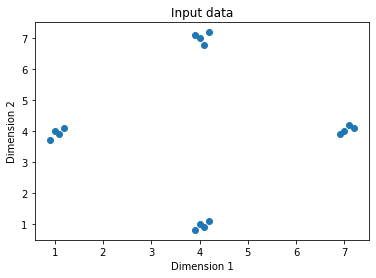

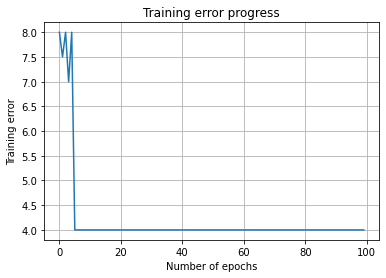


Test results:
[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


In [3]:
#import numpy as np
#import matplotlib.pyplot as plt
#import neurolab as nl

# Load input data
text = np.loadtxt('data_simple_nn.txt')

# Separate it into datapoints and labels
data = text[:, 0:2]
labels = text[:, 2:]

# Plot input data
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

# Minimum and maximum values for each dimension
dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()

# Define the number of neurons in the output layer
num_output = labels.shape[1]

# Define a single-layer neural network 
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output)

# Train the neural network
error_progress = nn.train(data, labels, epochs=100, show=20, lr=0.03)

# Plot the training progress
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

plt.show()

# Run the classifier on test datapoints
print('\nTest results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(item, '-->', nn.sim([item])[0])


## 3. 2-layer NN Regression

Epoch: 100; Error: 0.21886865164120034;
Epoch: 200; Error: 0.03636660138712931;
Epoch: 300; Error: 0.04966777059090638;
Epoch: 400; Error: 0.0315747774269083;
Epoch: 500; Error: 0.033259201369064954;
Epoch: 600; Error: 0.026846849257560895;
Epoch: 700; Error: 0.0237324987600471;
Epoch: 800; Error: 0.022519909834651193;
Epoch: 900; Error: 0.018311596862490134;
Epoch: 1000; Error: 0.017777207053449713;
Epoch: 1100; Error: 0.015569341916563766;
Epoch: 1200; Error: 0.013806013277446981;
Epoch: 1300; Error: 0.013195862260657044;
Epoch: 1400; Error: 0.011889872353133435;
Epoch: 1500; Error: 0.01079895893226624;
Epoch: 1600; Error: 0.010287008906851636;
The goal of learning is reached


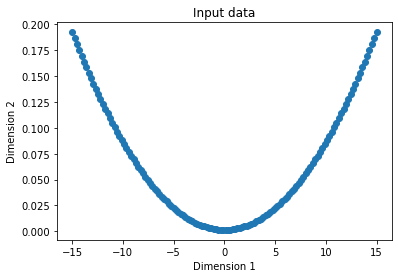

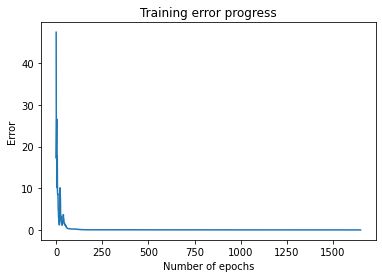

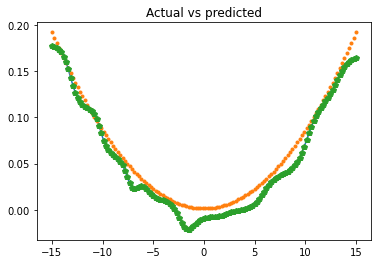

In [4]:
#import numpy as np
#import matplotlib.pyplot as plt
#import neurolab as nl

# Generate some training data
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

# Create data and labels
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

# Plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

# Define a multilayer neural network with 2 hidden layers;
# First hidden layer consists of 10 neurons
# Second hidden layer consists of 6 neurons
# Output layer consists of 1 neuron
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

# Train the neural network
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

# Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

# Plot training error
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

# Plot the output 
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')

plt.show()


In [ ]:
conda install -c conda-forge opencv

## 4. TF Gradient Decent Optimization

In [5]:
#Define the number of points to generate
num_points=1200

In [6]:
#Generate the data based on equation y=mx+c
data=[]
m=0.2
c=0.5
for i in range(num_points):
    #Generate x
    x = np.random.normal(0.0, 0.8)
    #Generate some noise
    noise = np.random.normal(0.0, 0.04)
    # Compute y
    y = m*x + c + noise
    data.append([x, y])

In [7]:
#Separate x and y
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]

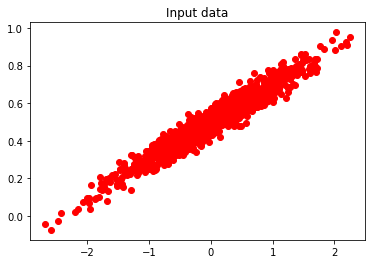

In [8]:
#Plot the generated data
plt.plot(x_data, y_data, 'ro')
plt.title('Input data')
plt.show()

In [9]:
#Generate weights and biases
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b  = tf.Variable(tf.zeros([1]))

In [10]:
#Define equation for y
y=W*x_data + b

In [11]:
#Define how to compute the loss
loss = tf.reduce_mean(tf.square(y - y_data))

In [12]:
#Define the graident descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [13]:
#Initialize all the variable
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [14]:
#Start the tensorflow session and run ti
sess = tf.Session()
sess.run(init)


IERATION 1
W = -0.1496908
b = 0.48100692
loss = 0.07360928


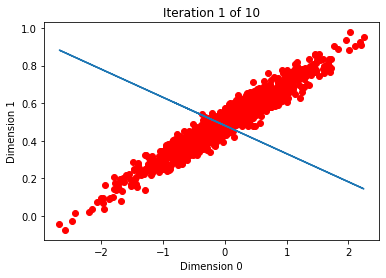


IERATION 2
W = 0.057065547
b = 0.49137422
loss = 0.013382141


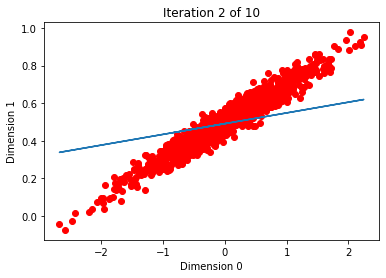


IERATION 3
W = 0.14086345
b = 0.4957838
loss = 0.0034863194


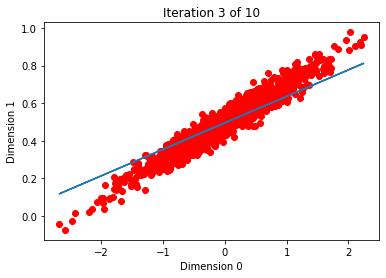


IERATION 4
W = 0.17483097
b = 0.49757102
loss = 0.0018603468


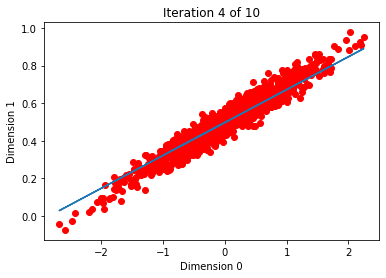


IERATION 5
W = 0.18859974
b = 0.49829546
loss = 0.0015931845


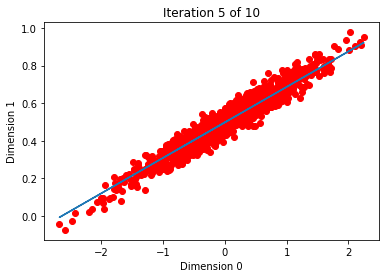


IERATION 6
W = 0.1941809
b = 0.4985891
loss = 0.0015492876


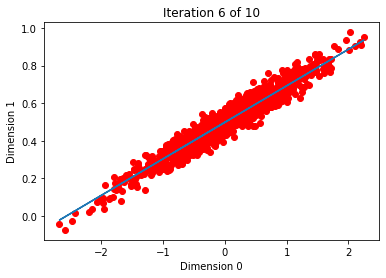


IERATION 7
W = 0.19644323
b = 0.49870813
loss = 0.0015420748


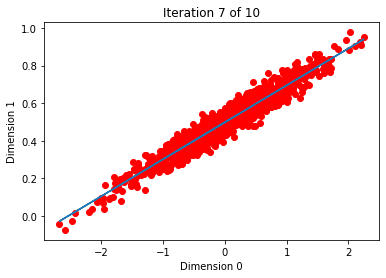


IERATION 8
W = 0.19736028
b = 0.49875638
loss = 0.0015408897


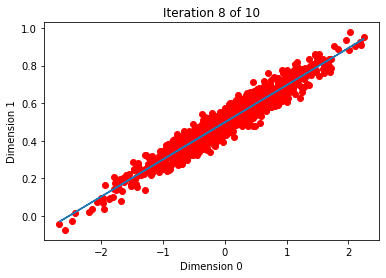


IERATION 9
W = 0.197732
b = 0.49877593
loss = 0.0015406951


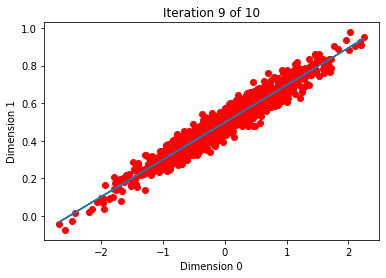


IERATION 10
W = 0.19788268
b = 0.49878386
loss = 0.0015406631


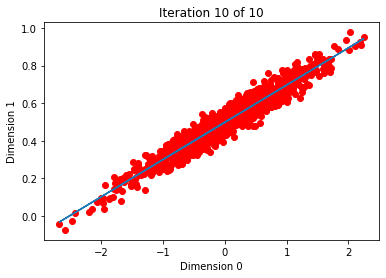

In [15]:
#Start interating
num_iterations = 10
for step in range(num_iterations):
    sess.run(train)
    #Print the progress
    print('\nIERATION', step+1)
    print('W =', sess.run(W)[0])
    print('b =', sess.run(b)[0])
    print('loss =', sess.run(loss))
    
    #Plot the input data
    plt.plot(x_data, y_data, 'ro')
    #Plot the predicted output line
    plt.plot(x_data, sess.run(W)*x_data + sess.run(b))
    #Set plotting parameters
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    plt.title('Iteration '+ str(step+1) + ' of ' +str(num_iterations))
    plt.show()

# 2. CNN on MNIST Data

- The codes provided here contains the needed functions that were discussed in lecture note. 
- Then, you can fill up the rest of codes to run. 
- Remember that this is TF1 version. 
- If you use TF2, some functions' names are changed but should work thoroughly if names are correctly changed. 

In [1]:
import argparse

import tensorflow as tf
import tensorflow_datasets
mnist = tensorflow_datasets.load('mnist')

def get_weights(shape):
    data = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(data)

def get_biases(shape):
    data = tf.constant(0.1, shape=shape)
    return tf.Variable(data)

def create_layer(shape):
    # Get the weights and biases
    W = get_weights(shape)
    b = get_biases([shape[-1]])

    return W, b

def convolution_2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1],
            padding='SAME')

def max_pooling(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
            strides=[1, 2, 2, 1], padding='SAME')

def CNN(X_train, Y_train, X_test, Y_test):
    
    # The images are 28x28. Create the input layer
    x = tf.placeholder(tf.float32, [None, 784])

    # Reshape 'x' into a 4D tensor
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    # Define the first convolutional layer
    W_conv1, b_conv1 = create_layer([5, 5, 1, 32])

    # Convolve the image with weight tensor, add the
    # bias, and then apply the ReLU function
    h_conv1 = tf.nn.relu(convolution_2d() + )

    # Apply the max pooling operator
    h_pool1 = max_pooling()

    # Define the second convolutional layer
    W_conv2, b_conv2 = create_layer([])

    # Convolve the output of previous layer with the
    # weight tensor, add the bias, and then apply
    # the ReLU function
    h_conv2 = tf.nn.relu(convolution_2d() + )

    # Apply the max pooling operator
    h_pool2 = max_pooling()

    # Define the fully connected layer
    W_fc1, b_fc1 = create_layer([])

    # Reshape the output of the previous layer
    h_pool2_flat = tf.reshape(h_pool2, [])

    # Multiply the output of previous layer by the
    # weight tensor, add the bias, and then apply
    # the ReLU function * Use "tf.matmul" for matrix multiplication
    h_fc1 = tf.nn.relu(tf.matmul() + )

    # Define the dropout layer using a probability placeholder
    # for all the neurons
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(, )

    # Define the readout layer (output layer)
    W_fc2, b_fc2 = create_layer([1024, 10])
    y_conv = tf.matmul() + b_fc2

    # Define the entropy loss and the optimizer
    y_loss = tf.placeholder(tf.float32, [None, 10])
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_loss))
    optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

    # Define the accuracy computation
    predicted = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_loss, 1))
    accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

    # Create and run a session
    sess = tf.InteractiveSession()
    init = tf.initialize_all_variables()
    sess.run(init)

    # Start training
    batch_size = 75
    num_iterations = math.ceil(X_train.shape[0] / batch_size)
    start = 0
    end = batch_size
    print('\nTraining the model....')
    for i in range(num_iterations):
        batch = (X_train[start:end], Y_train[start:end])
        start = end
        end = min(end + batch_size, X_train.shape[0])

        # Print progress
        if i % 50 == 0:
            cur_accuracy = accuracy.eval(feed_dict = {
                    x: batch[0], y_loss: batch[1], keep_prob: 1.0})
            print('Iteration', i, ', Accuracy =', cur_accuracy)

        # Train on the current batch
        optimizer.run(feed_dict = {x: batch[0], y_loss: batch[1], keep_prob: 0.5})

    # Compute accuracy using test data
    test_accuracy = accuracy.eval(feed_dict = {
            x: X_test, y_loss: Y_test,
            keep_prob: 1.0})
    print('Test accuracy =', test_accuracy)
    
    return test_accuracy

SyntaxError: invalid syntax (<ipython-input-1-14aba4fd34e5>, line 43)

# 2-1. Read own hand-written digits

- you can use the code below to start task #3. 
- You can run the same model as done in task #1 (any two models from the listed models) and in task #2 (NN and CNN) with your own writing. 

In [7]:
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np
rootdir = 'my_digits'

def read_img(img_path):
    img = cv2.imread(img_path)
    x_img = np.array([0] * 784)

    for i in range(28):
        for j in range(28):
            idx = i * 28 + j
            x_img[idx] = 255 - img[i][j][0]
            
    return x_img, img
    
X_mydigits = []
Y_mydigits = []
digit_imgs = []

# read handwritten digits
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".jpg"):
            path = os.path.join(subdir, file)
            digit, img = read_img(path)
            label = int(os.path.splitext(file)[0])
            X_mydigits.append(digit)
            Y_mydigits.append(label)
            digit_imgs.append(img)

X_mydigits = np.array(X_mydigits)
Y_mydigits = np.array(Y_mydigits)

In [ ]:
# show handwritten images
temp_img = ''
for i in range(5):
    hor = ''
    for j in range(10):
        idx = i*10 + j
        img = digit_imgs[idx]
        if j == 0:
            hor = img
        else:
            hor = np.hstack((hor, img))
    if i == 0:
        temp_img = hor
    else:
        temp_img = np.vstack((temp_img, hor))

plt.imshow(temp_img)
plt.axis('off')
plt.show()